In [1]:
import os
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
os.chdir('/Users/thorey/Documents/repos/pdsimage/pdsimage')
from Structure import *
from PDS_Extractor import *
imagep = '/Users/thorey/Documents/repos/pdsimage/docs/source/_static'

# Loading part of an image

Lola PDS Images can be found [here](http://imbrium.mit.edu/DATA/LOLA_GDR/CYLINDRICAL/IMG/) and WAC images can be found [here](http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/BDR/WAC_GLOBAL/).

Let's say we want to load a window defined at the bottom left by (lon0,lat0) and at the upper right by (lon1,lat1) on the 128 ppd (pixel/degree) LOLA image. 

In [10]:
lon0,lon1,lat0,lat1 =  0,20,-10,10
img = BinaryTable('LDEM_16')
X, Y, Z = img.extract_grid(lon0,lon1,lat0,lat1)

PDS FILES used are in: /Users/thorey/miniconda2/envs/pdsimage/lib/python2.7/site-packages/pdsimage/PDS_FILE


which returns an array of longitudes (X), an array of latitudes (Y) and the grid of altitude are contained in Z. No more. For a window 10° by 10°, it runs in less than 2s on my mac book pro.

# Looking at impact crater ?

Let's say, we want to get some detail about the crater Copernicus.

No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES
No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES


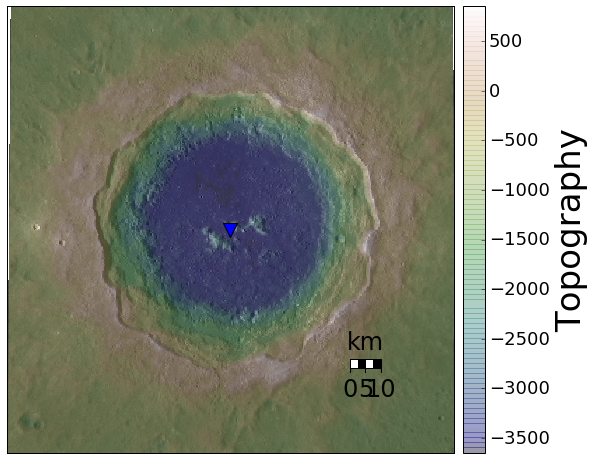

In [17]:
Copernicus = Crater('name','Copernicus', path_pdsfile = '/Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES')
Copernicus.ppdlola = 64
Copernicus.ppdwac = 64
Copernicus.overlay(True,name=os.path.join(imagep,'Corpernicus2.png'))

let you with this nice beautiful plot which overlay a WAC image and a LOLA image. Pixel/degree are pretty high by default. 

For a specific location, the program is able to automatically detect the corresponding patch images at the lunar surface and proposed to download it for you. Be careful with large resolution though, downloads can be very long. 

The default window in centred on the crater with a radius equal to the 80% of the crater diameter. However this can easily be changed and for instance, zooming in resume to 

No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES
No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES


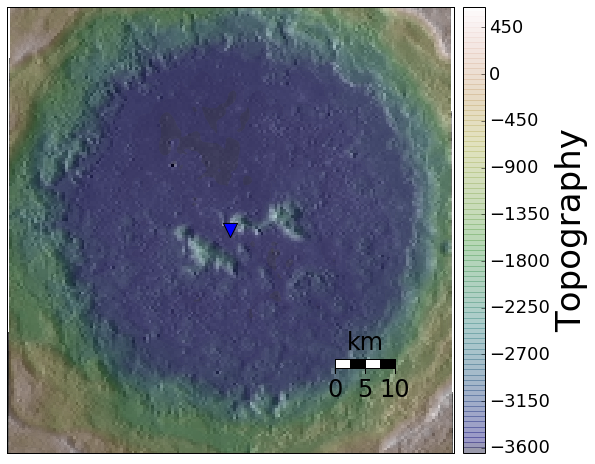

In [ ]:
Copernicus.change_window(0.4*Copernicus.diameter)
Copernicus.overlay(True,os.path.join(imagep,'CorpernicusZoom2.png'))

If you prefer working with the array directly, use the method Get_Arrays...

In [13]:
Xl , Yl , Zl = Copernicus.get_arrays('Lola')
Xw , Yw , Zw = Copernicus.get_arrays('Wac')

No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES
No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES


They can then be used for further analysis, histograms of the topography...

# Topographic profiles

The **Structure** class also contained a method which let your draw topographic profiles (or WAC profile if you want) without effort. For instance, if we look at an intrusive dome called 'M13' within the lunar maria and we want to plot three topographic profile
- one vertical passing through the centre
- one horizontal passing through the centre
- one oblique 

In [ ]:
M13 = Dome('name','M13', path_pdsfile = '/Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES')
M13.change_window(.9*M13.diameter)
M13.ppdlola = 64
midlon = (M13.window[0]+M13.window[1])/2.0
midlat = (M13.window[2]+M13.window[3])/2.0
profile1 = (midlon,midlon,11.1,12.5)
profile2 = (M13.window[0]+0.2,M13.window[1]-0.2,midlat,midlat)
profile3 = (360-32.1,360-31.3,11.1,12.5)
save_figure = os.path.join(imagep,'BaseProfile.png')
M13.draw_profile((profile1,profile2,profile3), save = True ,name = save_figure)

No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES
(328.47436333780405, 328.47436333780405, 11.1, 12.5)
No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES
No overlap - Processing should be quick
PDS FILES used are in: /Users/thorey/Documents/These/Projet/FFC/pdsimage/pdsimage/PDS_FILES
(327.56302247629867, 329.38570419930943, 11.677863288307606, 11.677863288307606)